In [1]:
import MetaTrader5 as mt5
import pandas as pd 
import numpy as np 
from scipy.stats import norm 
mt5.initialize()

True

In [2]:
def BlackScholes(r,S,K,T,sigma, tipoOpcao):
    # calcular o preco teórico pelo BS
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # vou calcular apenas para o P (Put)
    tipoOpcao = 'P'
    if tipoOpcao.upper() == "C":
        precoTeoricoOpcao = S * norm.cdf(d1,0,1) - K * np.exp(-r*T) * norm.cdf(d2,0,1)
    else:
        precoTeoricoOpcao = K * np.exp(-r*T) * norm.cdf(-d2,0,1) - S * norm.cdf(-d1,0,1) 
    precoTeoricoOpcao = round(precoTeoricoOpcao,2)
    return precoTeoricoOpcao


Text(0.5, 1.0, 'BBSET230 22.7')

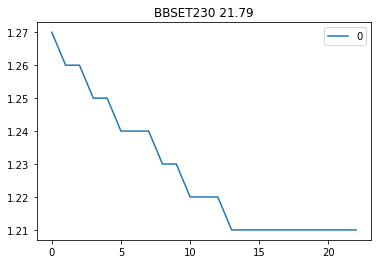

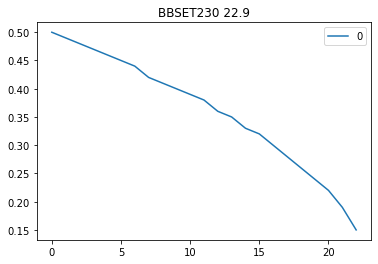

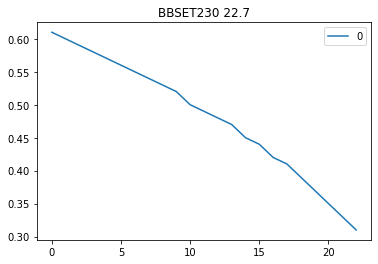

In [6]:
# COLUNA - Black & Scholes
opcao = 'BBSET230'
dias = 23        # dias uteis para vencimento
#opcao = 'BBSEU230'
#dias = 42           # dias uteis para vencimento


opcaoInfo = mt5.symbol_info(opcao)
ativoBaseInfo = mt5.symbol_info(opcaoInfo.basis)
r = 0.02
sigma = 0.20
K = opcaoInfo.option_strike

S0 = ativoBaseInfo.last
S1 = 22.90
S2 = 22.70

valores0 = []
valores1 = []
valores2 = []
for d in range(dias, 0, -1):
    T = d/365
    valores0.append(BlackScholes(r,S0,K,T,sigma, 'P'))
    valores1.append(BlackScholes(r,S1,K,T,sigma, 'P'))
    valores2.append(BlackScholes(r,S2,K,T,sigma, 'P'))
df0 = pd.DataFrame(valores0)
df0.plot().set_title(opcao + ' ' + str(S0))
df1 = pd.DataFrame(valores1)
df1.plot().set_title(opcao + ' ' + str(S1))
df2 = pd.DataFrame(valores2)
df2.plot().set_title(opcao + ' ' + str(S2))

Text(0.5, 1.0, 'IRBRT580 5.79')

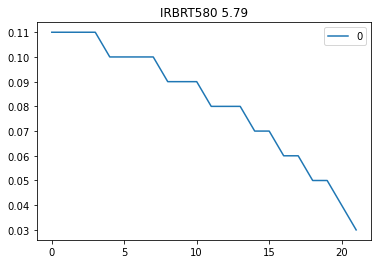

In [7]:
opcao = 'IRBRT580'
dias = 22        # dias uteis para vencimento
opcaoInfo = mt5.symbol_info(opcao)
ativoBaseInfo = mt5.symbol_info(opcaoInfo.basis)
r = 0.02
sigma = 0.20
K = opcaoInfo.option_strike

S0 = ativoBaseInfo.last
valores0 = []
for d in range(dias, 0, -1):
    T = d/365
    valores0.append(BlackScholes(r,S0,K,T,sigma, 'P'))
df0 = pd.DataFrame(valores0)
df0.plot().set_title(opcao + ' ' + str(S0))
